In [23]:
import os
import jieba
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
co_id = ['1909','2002']
years = ['95,96年','96,97年','97,98年','98,99年','99,100年','100,101年','101,102年','102,103年','103,104年','104,105年','105,106年','106,107年','107,108年','108,109年']

In [5]:
info =[]
for i in co_id:
    for z in years:
        merge = [i,z]
        info.append(merge)

In [6]:
info

[['1909', '95,96年'],
 ['1909', '96,97年'],
 ['1909', '97,98年'],
 ['1909', '98,99年'],
 ['1909', '99,100年'],
 ['1909', '100,101年'],
 ['1909', '101,102年'],
 ['1909', '102,103年'],
 ['1909', '103,104年'],
 ['1909', '104,105年'],
 ['1909', '105,106年'],
 ['1909', '106,107年'],
 ['1909', '107,108年'],
 ['1909', '108,109年'],
 ['2002', '95,96年'],
 ['2002', '96,97年'],
 ['2002', '97,98年'],
 ['2002', '98,99年'],
 ['2002', '99,100年'],
 ['2002', '100,101年'],
 ['2002', '101,102年'],
 ['2002', '102,103年'],
 ['2002', '103,104年'],
 ['2002', '104,105年'],
 ['2002', '105,106年'],
 ['2002', '106,107年'],
 ['2002', '107,108年'],
 ['2002', '108,109年']]

### 載入模型後將文字轉為向量！

In [7]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('word300.model') #載入模型

Euc_Man =[]

# 重複此步驟，直到資料載入完

### 依序將資料載入

In [12]:
all_file = []
txt_root = 'C:\\Users\\DC\\中文詞向量\\2002文字' #每次更動修改此處即可

In [13]:
for root, dirs, files in os.walk(txt_root): 
    for file in files: 
        all_file.append(root + '\\' + file)
        
all_txt = []

for i in range(0,len(all_file)):
    txt = open(all_file[i], 'r', encoding='utf-8').read()
    txt = txt.replace('■','').replace('、','').replace('：','').replace('\n','').replace(' ','').replace('●','').replace('，','').replace('│','').replace('。','').replace(',','').replace(';','').replace('(','').replace(')','').replace('；','')
    a =jieba.lcut(txt)
    all_txt.append(a)
    
    
padding = np.zeros((model.vector_size,), dtype=np.float32) #0向量
all_vec_add = []
vec_add = 0

for j in range(0,len(all_txt)):
    for i in all_txt[j]:
        try:
            vec_add += model.wv[i]
        except:
            model.wv[i] = padding
            vec_add += model.wv[i]
    all_vec_add.append(vec_add)
    vec_add = 0
    
Euc = []

for i in range(0,len(all_vec_add)-1):
    x = all_vec_add[i]
    y = all_vec_add[i+1]
    dis = np.linalg.norm( all_vec_add[i] - all_vec_add[i+1])
    Euc.append(dis)
    
Man = []

for i in range(0,len(all_vec_add)-1):
    x = all_vec_add[i]
    y = all_vec_add[i+1]
    dis =  1 - np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    Man.append(dis)

In [14]:
#Euc_Man =[]
for x,y in zip(Euc,Man):
    Euc_Man.append([x,y])

In [15]:
Euc_Man

[[54.133915, 3.5762786865234375e-07],
 [43.062218, 5.960464477539062e-07],
 [287.33676, 1.6689300537109375e-06],
 [45.87058, 8.940696716308594e-07],
 [59.09678, 6.556510925292969e-07],
 [28.84357, 4.76837158203125e-07],
 [349.75732, 1.0132789611816406e-06],
 [1684.4163, 7.152557373046875e-07],
 [117.87473, 4.172325134277344e-07],
 [360.80096, 2.384185791015625e-07],
 [143.11743, 5.960464477539063e-08],
 [173.32533, 2.384185791015625e-07],
 [166.95586, 2.384185791015625e-07],
 [281.5997, 2.384185791015625e-07],
 [161.83897, 6.556510925292969e-07],
 [407.5506, 5.364418029785156e-07],
 [354.7137, 4.172325134277344e-07],
 [28.31013, 5.960464477539062e-07],
 [117.519005, 5.960464477539062e-07],
 [92.390564, 1.7881393432617188e-07],
 [5.7022896, 6.556510925292969e-07],
 [67.03385, 4.172325134277344e-07],
 [123.8594, 5.960464477539062e-07],
 [242.78636, 4.172325134277344e-07],
 [74.89182, 2.980232238769531e-07],
 [167.5097, 7.152557373046875e-07],
 [95.86882, 4.76837158203125e-07],
 [461.2490

### 資料全部載入後檢查資料長度是否都對齊

In [16]:
print(len(info))
print(len(Euc_Man))  

28
28


In [17]:
data = pd.DataFrame(info,columns = ['co_id','years']).join(pd.DataFrame(Euc_Man,columns = ['Euc','Man']),how = 'outer')
data

,co_id,years,Euc,Man
0,1909,"95,96年",54.133915,3.576279e-07
1,1909,"96,97年",43.062218,5.960464e-07
2,1909,"97,98年",287.336761,1.668930e-06
3,1909,"98,99年",45.870579,8.940697e-07
4,1909,"99,100年",59.096779,6.556511e-07
5,1909,"100,101年",28.843571,4.768372e-07
6,1909,"101,102年",349.757324,1.013279e-06
7,1909,"102,103年",1684.416260,7.152557e-07
8,1909,"103,104年",117.874733,4.172325e-07
9,1909,"104,105年",360.800964,2.384186e-07


Text(0.5, 1.0, 'Scatter Chart')

C:\Users\DC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


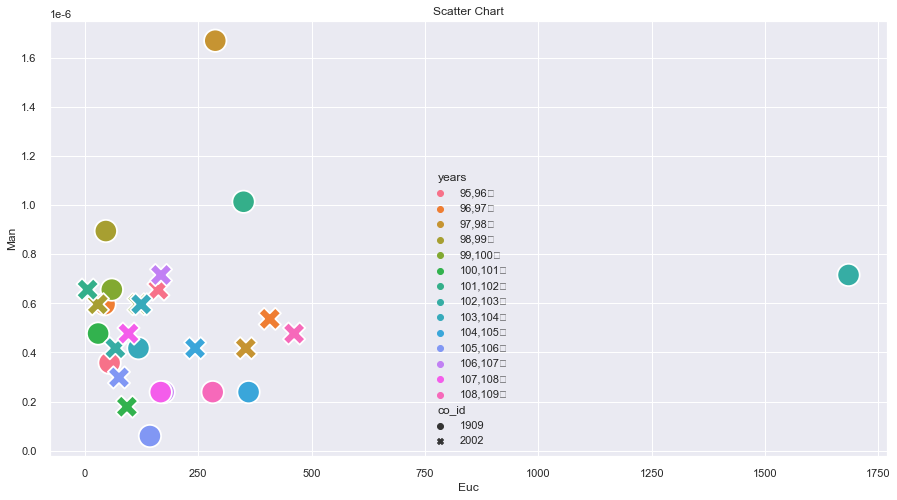

In [34]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.scatterplot(x = data['Euc'],y = data['Man'], hue=data['years'],style=data['co_id'],s = 500)
ax.set_title('Scatter Chart')